# Image as Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np

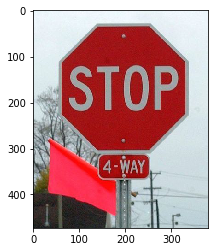

In [15]:
data = plt.imread('Stop Sign Dataset/stop.jpg')
plt.imshow(data)
plt.show()

In [18]:
data.shape

(473, 380, 3)

In [24]:
data[100, 150]

array([157,  18,  21], dtype=uint8)

In [32]:
# informação apenas no canal vermelho
data[:, :, 1] = 0
data[:, :, 2] = 0
plt.imshow(data)
plt.show()

ValueError: assignment destination is read-only

# Classifying images

In [33]:
labels = ["shoe", "dress", "shoe", "t-shirt", 
          "shoe", "t-shirt", "shoe", "dress"]

Representing class data: one-hot encoding

In [36]:
np.array([[0., 0., 1.],   # <= shoe
       [0., 1., 0.],   # <= dress
       [0., 0., 1.],   # <= shoe
       [1., 0., 0.],   # <= t-shirt
       [0., 0., 1.],   # <= shoe
       [1., 0., 0.],   # <= t-shirt
       [0., 0., 1.],   # <= shoe
       [0., 1., 0.]])  # <= dress

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [55]:
# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

In [56]:
ohe_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [57]:
test = np.array([[0., 0., 1.], 
       [0., 1., 0.], 
       [0., 0., 1.], 
       [0., 1., 0.], 
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [58]:
prediction = np.array([[0., 0., 1.], 
       [0., 1., 0.], 
       [0., 0., 1.], 
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [59]:
# One-hot encoding: testing predictions
test * prediction

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [60]:
# numero de previsões corretas
(test * prediction).sum()

6.0

In [61]:
(test * prediction).sum() / float(len(test))

0.75

# Keras for image classification

### Build a neural network

We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the Sequential type, meaning that the outputs of one layer are provided as inputs only to the next layer.

In this exercise, you will create a neural network with Dense layers, meaning that each unit in each layer is connected to all of the units in the previous layer. For example, each unit in the first layer is connected to all of the pixels in the input images. The Dense layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an input_shape keyword argument.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the Keras Cheat Sheet and keep it handy!

In [2]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

W0707 13:28:43.381461 140505471067968 deprecation_wrapper.py:119] From /home/cloves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 13:28:43.399849 140505471067968 deprecation_wrapper.py:119] From /home/cloves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 13:28:43.402862 140505471067968 deprecation_wrapper.py:119] From /home/cloves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### Compile a neural network

Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list ['accuracy'] to the metrics keyword argument.

Write code to compile the model with the [adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) optimizer and 'categorical_crossentropy' as the loss function.

In [3]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

W0707 14:15:32.541717 140505471067968 deprecation_wrapper.py:119] From /home/cloves/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 14:15:32.571407 140505471067968 deprecation_wrapper.py:119] From /home/cloves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Fitting a neural network model to clothing data

In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: train_data that contains the pixel data for 50 images of the three clothing classes and train_labels, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.

The model you compiled in the previous exercise, and train_data and train_labels are available in your workspace.

In [5]:
# Reshape the data to two-dimensional array
# 50 images, with 28x28 pixels = a vector uma 784 dimensions
train_data = train_data.reshape((50, 784))

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

NameError: name 'train_data' is not defined

### Cross-validation for neural network evaluation

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

The model you fit in the previous exercise, and test_data and test_labels are available in your workspace.

In [6]:
# Reshape test data
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)

NameError: name 'test_data' is not defined

# Using correlations in images

* Natural images contain spatial correlations
* For example, pixels along a contour or edge
* How can we use these correlations?

What is a convolution?

Let's stard in one sample exemple, a convolution in one 
demension.

We have a array that has a edge on the midle,
that go from zeros to ones.

The kernel defines the feature that We are looking for.

In this case We looking for a change of small values 
on the left to large values on the right.

In [11]:
array = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

kernel = np.array([-1, 1])

conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])

for ii in range(8):
    # conv[0] = (kernel * array[0:2]).sum()
    # conv[1] = (kernel * array[1:3]).sum()
    # conv[2] = (kernel * array[2:4]).sum()
    conv[ii] = (kernel * array[ii:ii+2]).sum()
    
conv

array([0, 0, 0, 0, 1, 0, 0, 0, 0])

### Two-dimensional convolution

![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/6c00959d6fb39d4e14fb369cb605a6aa21562e75/no_padding_no_strides.gif)

In [13]:
kernel = np.array([[-1, 1], 
                   [-1, 1]])

conv = np.zeros((27, 27))
for ii in range(27):
    for jj in range(27):
        window = image[ii:ii+2, jj:jj+2] 
        conv[ii, jj] = np.sum(window * kernel)

NameError: name 'image' is not defined

### Keras 'Convolution' layer

In [14]:
from keras.layers import Conv2D

Conv2D(10, kernel_size=3, activation='relu')

In [15]:
# Integrating convolution layers into a network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1)))

model.add(Flatten())

model.add(Dense(3, activation='softmax'))

NameError: name 'img_rows' is not defined

In [16]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
train_data.shape

model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

model.evaluate(test_data, test_labels, epochs=3)

NameError: name 'train_data' is not defined

In [3]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())

# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.
W0715 12:07:10.123234 140269985224512 deprecation_wrapper.py:119] From /home/cloves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



NameError: name 'img_rows' is not defined

In [21]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

NameError: name 'train_data' is not defined

In [22]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels,
                batch_size=10)

NameError: name 'test_data' is not defined

### Convolution with zero padding

![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/d372dfbd801c83213bd137655da896e28eb7b5b3/convolution_animation.gif)

When We add zeros in edges images, the convolution matrix get the same size that orinal image.
That can be good if We'll work with many layers.

In [24]:
# Zero padding in Keras

model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)),
                 padding='valid') # with 'valid' no zeros are padding

NameError: name 'img_rows' is not defined

In [25]:
# Zero padding in Keras

model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)),
                 padding='same') # so, convolution matrix have the same size of input

NameError: name 'img_rows' is not defined

### Strides

![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/25bb19212056fe26e3f73e246a323768c1881fbf/padding_strides.gif)

In [26]:
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)),
                 strides=2)

NameError: name 'img_rows' is not defined

### Calculating the size of the output

O=((I−K+2P)/S)+1

where

* I = size of the input
* K = size of the kernel
* P = size of the zero padding
* S = strides

### Dilated convolutions

![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/228817e1e9e70f9d2afdba84d99cc6cf48648990/dilation.gif)

In [27]:
((256 - 4 + 2*1)/2) + 1

128.0

# Network with one convolutional layer

![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/4acb90dffc2d4226bf351ba01e164b60e3188541/conv2d_1.png)

In [5]:
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

NameError: name 'img_rows' is not defined

### Building a deep network

![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/cdc8c93bd1986368c7e9bad5a0258f8d1d513935/Conv2D_2.png)

In [7]:
model = Sequential()

model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='equal'))

# Second convolutional layer
model.add(Conv2D(10, kernel_size=2, activation='relu')
model.add(Flatten())
          
model.add(Dense(3, activation='softmax'))

SyntaxError: invalid syntax (<ipython-input-7-43d4aec86d13>, line 9)

### Why do we want deep networks?

![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/89a36121b1a50776992a9447b499efa564da411d/googlenet.png)

### How deep?

* Depth comes at a computational cost
* May require more data

### How many parameters?

In [8]:
model = Sequential()

model.add(Dense(10, activation='relu', 
          input_shape=(784,)))

model.add(Dense(10, activation='relu'))

model.add(Dense(3, activation='softmax'))

W0715 14:11:12.426622 140269985224512 deprecation_wrapper.py:119] From /home/cloves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 14:11:12.510496 140269985224512 deprecation_wrapper.py:119] From /home/cloves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
# Call the summary method 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 7,993
Trainable params: 7,993
Non-trainable params: 0
_________________________________________________________________


parameters = 784 * 10 + 10 = 7850

### Reducing parameters with pooling

#### Max pooling

Get the max value of a window in the image.

![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/44bb48885e3c2c92a2defc3ef9695e74134e9e7c/maxpooling6.png)


![alt_text](https://assets.datacamp.com/production/repositories/1820/datasets/02ff70485a5583941a0699352430ad9ebbaa7d66/maxpooling_result.png)

We end with britest pixels in each part of the image.

### Implementing max pooling

In [3]:
import matplotlib.pyplot as plt
import numpy as np

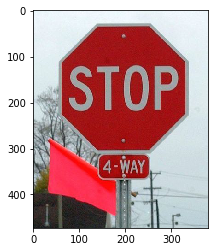

In [4]:
im = plt.imread('Stop Sign Dataset/stop.jpg')
plt.imshow(im)
plt.show()

In [10]:
# primeiro criamos a matriz que receberá 
# o output do processo de pooling.
# Ela terá metade do tamanho da matriz
# de pixel original.
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

In [11]:
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# iterando em janelas 2x2 
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])
        
# Esse loop segue o seguinte processo 
# result[0, 0] = np.max(im[0:2, 0:2])
# result[0, 1] = np.max(im[0:2, 2:4])
# result[0, 2] = np.max(im[0:2, 4:6])

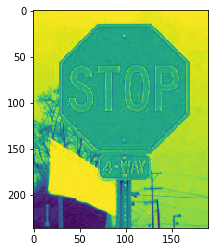

In [13]:
plt.imshow(result)
plt.show()

#### Max pooling in Keras

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

Using TensorFlow backend.


In [16]:
img_rows, img_cols = (im.shape[0], im.shape[1])

In [19]:
# sem max pooling
model = Sequential()
model.add(Conv2D(5, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1)))

model.add(Conv2D(15, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1)))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 471, 378, 5)       50        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 469, 376, 15)      690       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2645160)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 7935483   
Total params: 7,936,223
Trainable params: 7,936,223
Non-trainable params: 0
_________________________________________________________________


In [21]:
# com max pooling
model = Sequential()
model.add(Conv2D(5, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(15, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 471, 378, 5)       50        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 235, 189, 5)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 233, 187, 15)      690       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 116, 93, 15)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 161820)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 485463    
Total params: 486,203
Trainable params: 486,203
Non-trainable params: 0
_________________________________________________________________


In [22]:
print("Uma redução de %d parâmetros." %(7936223 - 486203))

Uma redução de 7450020 parâmetros.
